In [1]:
import pandas as pd
import numpy as numpy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pwii_combined_data = pd.read_csv('post_WWII_data_1002.csv').drop(columns='result')


In [3]:
pwii_combined_data['total_goals']=pwii_combined_data.home_score + pwii_combined_data.away_score
pwii_combined_data.head()


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,...,month,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,results,total_goals
0,0,1950-01-24,Zambia,DR Congo,1,0,Friendly,Kitwe,Northern Rhodesia,False,...,1,1,win,NaN,NaN,Others,Africa,Africa,Zambia,1
1,1,1950-02-17,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,...,2,2,win,NaN,NaN,Africa,Africa,Europe,Egypt,2
2,2,1950-02-26,Bolivia,Chile,2,0,Friendly,La Paz,Bolivia,False,...,2,2,win,NaN,NaN,South America,South America,South America,Bolivia,2
3,3,1950-02-26,Croatia,Serbia,4,1,Friendly,Zagreb,Yugoslavia,False,...,2,3,win,NaN,NaN,Europe,Europe,Europe,Croatia,5
4,4,1950-03-05,Italy,Belgium,3,1,Friendly,Bologna,Italy,False,...,3,2,win,NaN,NaN,Europe,Europe,Europe,Italy,4


In [4]:
bins = [0,1950,1960,1970,1980,1990,2000,2010,2020]
labels = ['before 50',"50's","60's","70's","80's","90's","2000's","2010's"]
pwii_combined_data['era'] = pd.cut(pwii_combined_data['year'], bins=bins, labels=labels)

In [5]:
before_50 = pwii_combined_data.loc[pwii_combined_data['era']== "before 50",:]
decade_50 = pwii_combined_data.loc[pwii_combined_data['era']== "50's",:]
decade_60 = pwii_combined_data.loc[pwii_combined_data['era']== "60's",:]
decade_70 = pwii_combined_data.loc[pwii_combined_data['era']== "70's",:]
decade_80 = pwii_combined_data.loc[pwii_combined_data['era']== "80's",:]
decade_90 = pwii_combined_data.loc[pwii_combined_data['era']== "90's",:]
decade_2000 = pwii_combined_data.loc[pwii_combined_data['era']== "2000's",:]
decade_2010 = pwii_combined_data.loc[pwii_combined_data['era']== "2010's",:]

In [6]:
pwii_wins_before_50 = before_50.results.value_counts()
pwii_wins_before_50_df = pd.DataFrame(pwii_wins_before_50)
pwii_wins_before_50_df = pwii_wins_before_50_df.reset_index()
pwii_wins_before_50_df = pwii_wins_before_50_df.rename(columns={'index':'team'})
pwii_wins_before_50_df.head()

,team,results
0,Tie,19
1,Yugoslavia,7
2,Trinidad and Tobago,7
3,Brazil,6
4,England,6


In [7]:
pwii_grouped_home_before_50 = before_50.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_before_50 = pwii_grouped_home_before_50.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_before_50.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Albania,2,1,3
1,Argentina,6,2,8
2,Austria,21,9,30
3,Belgium,19,8,27
4,Bolivia,2,8,10


In [8]:
pwii_grouped_away_before_50 = before_50.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_before_50 = pwii_grouped_away_before_50.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_before_50.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,4,0,4
1,Albania,18,0,18
2,Australia,7,16,23
3,Austria,4,4,8
4,Belgium,6,4,10


In [9]:
pwii_overview_score_before_50 = pd.merge(pwii_grouped_home_score_before_50,pwii_grouped_away_score_before_50,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_before_50.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,2.0,1.0,3.0,Albania,18.0,0.0,18.0
1,Argentina,6.0,2.0,8.0,NaN,NaN,NaN,NaN
2,Austria,21.0,9.0,30.0,Austria,4.0,4.0,8.0
3,Belgium,19.0,8.0,27.0,Belgium,6.0,4.0,10.0
4,Bolivia,2.0,8.0,10.0,Bolivia,5.0,0.0,5.0


In [10]:
pwii_grouped_home_count_before_50 = before_50.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [11]:
pwii_grouped_away_count_before_50 = before_50.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [12]:
pwii_overview_count_before_50 = pd.merge(pwii_grouped_home_count_before_50,pwii_grouped_away_count_before_50, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_before_50 = pwii_overview_count_before_50.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [13]:
pwii_overview_combined_before_50 = pd.merge(pwii_overview_count_before_50,pwii_overview_score_before_50,on=['home_team','away_team'],how='outer')
pwii_overview_combined_before_50 = pwii_overview_combined_before_50.rename(columns={'home_team':'team'})
pwii_overview_combined_before_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Albania,2.0,2.0,Albania,2.0,2.0,2.0,1.0,3.0,18.0,0.0,18.0
1,Argentina,2.0,2.0,NaN,NaN,NaN,6.0,2.0,8.0,NaN,NaN,NaN
2,Austria,5.0,5.0,Austria,2.0,2.0,21.0,9.0,30.0,4.0,4.0,8.0
3,Belgium,5.0,5.0,Belgium,2.0,2.0,19.0,8.0,27.0,6.0,4.0,10.0
4,Bolivia,2.0,2.0,Bolivia,1.0,1.0,2.0,8.0,10.0,5.0,0.0,5.0


In [14]:
pwii_overview_combined_before_50['total_goals']=pwii_overview_combined_before_50.home_goals + pwii_overview_combined_before_50.away_goals
pwii_overview_combined_before_50['total_games']=pwii_overview_combined_before_50.home_game_count + pwii_overview_combined_before_50.away_game_count


In [15]:
pwii_overview_combined_wins_before_50 = pd.merge(pwii_overview_combined_before_50,pwii_wins_before_50_df,how='outer')
pwii_overview_combined_wins_before_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Albania,2.0,2.0,Albania,2.0,2.0,2.0,1.0,3.0,18.0,0.0,18.0,2.0,4.0,1.0
1,Argentina,2.0,2.0,NaN,NaN,NaN,6.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0
2,Austria,5.0,5.0,Austria,2.0,2.0,21.0,9.0,30.0,4.0,4.0,8.0,25.0,7.0,5.0
3,Belgium,5.0,5.0,Belgium,2.0,2.0,19.0,8.0,27.0,6.0,4.0,10.0,23.0,7.0,4.0
4,Bolivia,2.0,2.0,Bolivia,1.0,1.0,2.0,8.0,10.0,5.0,0.0,5.0,2.0,3.0,1.0


In [16]:
pwii_overview_combined_wins_before_50['winning_rate']=pwii_overview_combined_wins_before_50.results / pwii_overview_combined_wins_before_50.total_games
pwii_overview_combined_ranked_before_50 = pwii_overview_combined_wins_before_50.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_before_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
27,Mauritius,1.0,1.0,Mauritius,1.0,1.0,15.0,2.0,17.0,1.0,5.0,6.0,20.0,2.0,2.0,1.000000
44,Trinidad and Tobago,4.0,4.0,Trinidad and Tobago,5.0,5.0,14.0,4.0,18.0,3.0,8.0,11.0,22.0,9.0,7.0,0.777778
2,Austria,5.0,5.0,Austria,2.0,2.0,21.0,9.0,30.0,4.0,4.0,8.0,25.0,7.0,5.0,0.714286
45,Turkey,2.0,2.0,Turkey,1.0,1.0,9.0,3.0,12.0,5.0,1.0,6.0,10.0,3.0,2.0,0.666667
43,Tanzania,1.0,1.0,Tanzania,2.0,2.0,4.0,0.0,4.0,2.0,3.0,5.0,7.0,3.0,2.0,0.666667


In [17]:
scoped_down_before_50 = pwii_overview_combined_ranked_before_50.loc[pwii_overview_combined_ranked_before_50['total_games'] >= 5, :]
scoped_down_before_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
44,Trinidad and Tobago,4.0,4.0,Trinidad and Tobago,5.0,5.0,14.0,4.0,18.0,3.0,8.0,11.0,22.0,9.0,7.0,0.777778
2,Austria,5.0,5.0,Austria,2.0,2.0,21.0,9.0,30.0,4.0,4.0,8.0,25.0,7.0,5.0,0.714286
13,England,4.0,4.0,England,5.0,5.0,6.0,6.0,12.0,5.0,16.0,21.0,22.0,9.0,6.0,0.666667
20,Hungary,3.0,3.0,Hungary,3.0,3.0,21.0,3.0,24.0,8.0,9.0,17.0,30.0,6.0,4.0,0.666667
47,Yugoslavia,2.0,2.0,Yugoslavia,9.0,9.0,9.0,1.0,10.0,17.0,23.0,40.0,32.0,11.0,7.0,0.636364


In [18]:
top_5_before_50 = scoped_down_before_50.iloc[:5, :]
top_5_before_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
44,Trinidad and Tobago,4.0,4.0,Trinidad and Tobago,5.0,5.0,14.0,4.0,18.0,3.0,8.0,11.0,22.0,9.0,7.0,0.777778
2,Austria,5.0,5.0,Austria,2.0,2.0,21.0,9.0,30.0,4.0,4.0,8.0,25.0,7.0,5.0,0.714286
13,England,4.0,4.0,England,5.0,5.0,6.0,6.0,12.0,5.0,16.0,21.0,22.0,9.0,6.0,0.666667
20,Hungary,3.0,3.0,Hungary,3.0,3.0,21.0,3.0,24.0,8.0,9.0,17.0,30.0,6.0,4.0,0.666667
47,Yugoslavia,2.0,2.0,Yugoslavia,9.0,9.0,9.0,1.0,10.0,17.0,23.0,40.0,32.0,11.0,7.0,0.636364


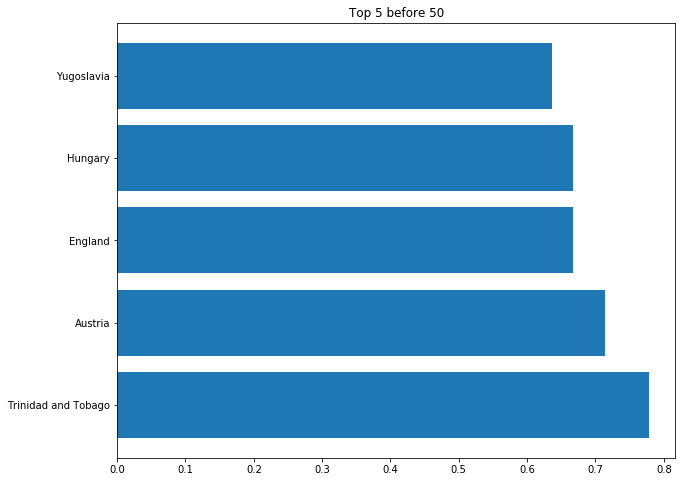

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_before_50['team'], top_5_before_50['winning_rate'],align='center')
plt.title('Top 5 before 50')
plt.show()

In [20]:
pwii_wins_decade_50 = decade_50.results.value_counts()
pwii_wins_decade_50_df = pd.DataFrame(pwii_wins_decade_50)
pwii_wins_decade_50_df = pwii_wins_decade_50_df.reset_index()
pwii_wins_decade_50_df = pwii_wins_decade_50_df.rename(columns={'index':'team'})
pwii_wins_decade_50_df.head()

,team,results
0,Tie,312
1,Brazil,65
2,Hungary,59
3,Argentina,50
4,Sweden,45


In [21]:
pwii_grouped_home_decade_50 = decade_50.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_50 = pwii_grouped_home_decade_50.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_50.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Albania,6,3,9
1,Argentina,132,54,186
2,Aruba,10,6,16
3,Australia,11,34,45
4,Austria,104,66,170


In [22]:
pwii_grouped_away_decade_50 = decade_50.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_50 = pwii_grouped_away_decade_50.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_50.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,3,2,5
1,Argentina,32,36,68
2,Aruba,20,11,31
3,Australia,4,5,9
4,Austria,76,65,141


In [23]:
pwii_overview_score_decade_50 = pd.merge(pwii_grouped_home_score_decade_50,pwii_grouped_away_score_decade_50,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_50.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,6.0,3.0,9.0,Albania,3.0,2.0,5.0
1,Argentina,132.0,54.0,186.0,Argentina,32.0,36.0,68.0
2,Aruba,10.0,6.0,16.0,Aruba,20.0,11.0,31.0
3,Australia,11.0,34.0,45.0,Australia,4.0,5.0,9.0
4,Austria,104.0,66.0,170.0,Austria,76.0,65.0,141.0


In [24]:
pwii_grouped_home_count_decade_50 = decade_50.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [25]:
pwii_grouped_away_count_decade_50 = decade_50.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [26]:
pwii_overview_count_decade_50 = pd.merge(pwii_grouped_home_count_decade_50,pwii_grouped_away_count_decade_50, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_50 = pwii_overview_count_decade_50.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [27]:
pwii_overview_combined_decade_50 = pd.merge(pwii_overview_count_decade_50,pwii_overview_score_decade_50,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_50 = pwii_overview_combined_decade_50.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Albania,3.0,3.0,Albania,1.0,1.0,6.0,3.0,9.0,3.0,2.0,5.0
1,Argentina,51.0,51.0,Argentina,27.0,27.0,132.0,54.0,186.0,32.0,36.0,68.0
2,Aruba,4.0,4.0,Aruba,8.0,8.0,10.0,6.0,16.0,20.0,11.0,31.0
3,Australia,9.0,9.0,Australia,2.0,2.0,11.0,34.0,45.0,4.0,5.0,9.0
4,Austria,40.0,40.0,Austria,35.0,35.0,104.0,66.0,170.0,76.0,65.0,141.0


In [28]:
pwii_overview_combined_decade_50['total_goals']=pwii_overview_combined_decade_50.home_goals + pwii_overview_combined_decade_50.away_goals
pwii_overview_combined_decade_50['total_games']=pwii_overview_combined_decade_50.home_game_count + pwii_overview_combined_decade_50.away_game_count


In [29]:
pwii_overview_combined_wins_decade_50 = pd.merge(pwii_overview_combined_decade_50,pwii_wins_decade_50_df,how='outer')
pwii_overview_combined_wins_decade_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Albania,3.0,3.0,Albania,1.0,1.0,6.0,3.0,9.0,3.0,2.0,5.0,8.0,4.0,2.0
1,Argentina,51.0,51.0,Argentina,27.0,27.0,132.0,54.0,186.0,32.0,36.0,68.0,168.0,78.0,50.0
2,Aruba,4.0,4.0,Aruba,8.0,8.0,10.0,6.0,16.0,20.0,11.0,31.0,21.0,12.0,2.0
3,Australia,9.0,9.0,Australia,2.0,2.0,11.0,34.0,45.0,4.0,5.0,9.0,16.0,11.0,3.0
4,Austria,40.0,40.0,Austria,35.0,35.0,104.0,66.0,170.0,76.0,65.0,141.0,169.0,75.0,31.0


In [30]:
pwii_overview_combined_wins_decade_50['winning_rate']=pwii_overview_combined_wins_decade_50.results / pwii_overview_combined_wins_decade_50.total_games
pwii_overview_combined_ranked_decade_50 = pwii_overview_combined_wins_decade_50.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
84,North Korea,3.0,3.0,North Korea,4.0,4.0,9.0,0.0,9.0,3.0,14.0,17.0,23.0,7.0,6.0,0.857143
75,Mauritius,9.0,9.0,Mauritius,8.0,8.0,55.0,11.0,66.0,11.0,27.0,38.0,82.0,17.0,14.0,0.823529
104,South Africa,1.0,1.0,South Africa,7.0,7.0,2.0,1.0,3.0,13.0,27.0,40.0,29.0,8.0,6.0,0.750000
14,Cameroon,3.0,3.0,Cameroon,1.0,1.0,12.0,4.0,16.0,4.0,5.0,9.0,17.0,4.0,3.0,0.750000
53,Hungary,40.0,40.0,Hungary,48.0,48.0,141.0,39.0,180.0,73.0,142.0,215.0,283.0,88.0,59.0,0.670455


In [31]:
scoped_down_decade_50 = pwii_overview_combined_ranked_decade_50.loc[pwii_overview_combined_ranked_decade_50['total_games'] >= 50, :]
scoped_down_decade_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
53,Hungary,40.0,40.0,Hungary,48.0,48.0,141.0,39.0,180.0,73.0,142.0,215.0,283.0,88.0,59.0,0.670455
10,Brazil,57.0,57.0,Brazil,43.0,43.0,148.0,54.0,202.0,50.0,85.0,135.0,233.0,100.0,65.0,0.650000
1,Argentina,51.0,51.0,Argentina,27.0,27.0,132.0,54.0,186.0,32.0,36.0,68.0,168.0,78.0,50.0,0.641026
110,Sweden,44.0,44.0,Sweden,40.0,40.0,114.0,63.0,177.0,67.0,93.0,160.0,207.0,84.0,45.0,0.535714
126,Yugoslavia,31.0,31.0,Yugoslavia,45.0,45.0,94.0,39.0,133.0,64.0,90.0,154.0,184.0,76.0,40.0,0.526316


In [32]:
top_5_decade_50 = scoped_down_decade_50.iloc[:5, :]
top_5_decade_50.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
53,Hungary,40.0,40.0,Hungary,48.0,48.0,141.0,39.0,180.0,73.0,142.0,215.0,283.0,88.0,59.0,0.670455
10,Brazil,57.0,57.0,Brazil,43.0,43.0,148.0,54.0,202.0,50.0,85.0,135.0,233.0,100.0,65.0,0.650000
1,Argentina,51.0,51.0,Argentina,27.0,27.0,132.0,54.0,186.0,32.0,36.0,68.0,168.0,78.0,50.0,0.641026
110,Sweden,44.0,44.0,Sweden,40.0,40.0,114.0,63.0,177.0,67.0,93.0,160.0,207.0,84.0,45.0,0.535714
126,Yugoslavia,31.0,31.0,Yugoslavia,45.0,45.0,94.0,39.0,133.0,64.0,90.0,154.0,184.0,76.0,40.0,0.526316


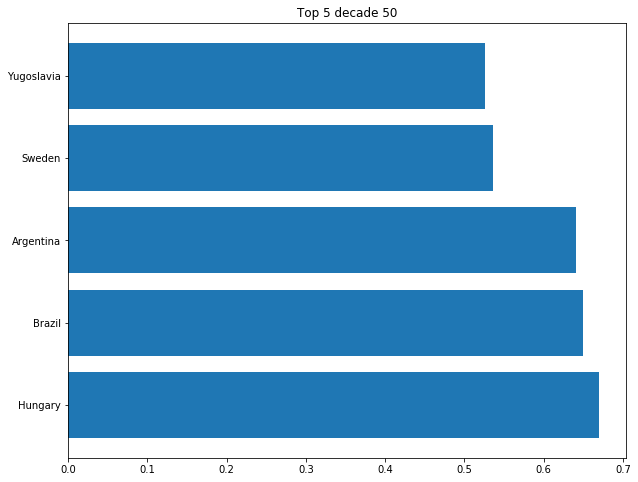

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_50['team'], top_5_decade_50['winning_rate'],align='center')
plt.title('Top 5 decade 50')
plt.show()

In [34]:
pwii_wins_decade_60 = decade_60.results.value_counts()
pwii_wins_decade_60_df = pd.DataFrame(pwii_wins_decade_60)
pwii_wins_decade_60_df = pwii_wins_decade_60_df.reset_index()
pwii_wins_decade_60_df = pwii_wins_decade_60_df.rename(columns={'index':'team'})
pwii_wins_decade_60_df.head()

,team,results
0,Tie,580
1,Brazil,78
2,England,64
3,Russia,57
4,Germany,52


In [35]:
pwii_grouped_home_decade_60 = decade_60.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_60 = pwii_grouped_home_decade_60.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_60.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Albania,2,7,9
1,Algeria,28,22,50
2,Argentina,85,30,115
3,Australia,28,20,48
4,Austria,40,39,79


In [36]:
pwii_grouped_away_decade_60 = decade_60.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_60 = pwii_grouped_away_decade_60.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_60.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,26,2,28
1,Algeria,10,3,13
2,Argentina,65,45,110
3,Australia,14,28,42
4,Austria,66,39,105


In [37]:
pwii_overview_score_decade_60 = pd.merge(pwii_grouped_home_score_decade_60,pwii_grouped_away_score_decade_60,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_60.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,2.0,7.0,9.0,Albania,26.0,2.0,28.0
1,Algeria,28.0,22.0,50.0,Algeria,10.0,3.0,13.0
2,Argentina,85.0,30.0,115.0,Argentina,65.0,45.0,110.0
3,Australia,28.0,20.0,48.0,Australia,14.0,28.0,42.0
4,Austria,40.0,39.0,79.0,Austria,66.0,39.0,105.0


In [38]:
pwii_grouped_home_count_decade_60 = decade_60.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [39]:
pwii_grouped_away_count_decade_60 = decade_60.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [40]:
pwii_overview_count_decade_60 = pd.merge(pwii_grouped_home_count_decade_60,pwii_grouped_away_count_decade_60, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_60 = pwii_overview_count_decade_60.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [41]:
pwii_overview_combined_decade_60 = pd.merge(pwii_overview_count_decade_60,pwii_overview_score_decade_60,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_60 = pwii_overview_combined_decade_60.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_60.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Albania,6.0,6.0,Albania,8.0,8.0,2.0,7.0,9.0,26.0,2.0,28.0
1,Algeria,18.0,18.0,Algeria,9.0,9.0,28.0,22.0,50.0,10.0,3.0,13.0
2,Argentina,38.0,38.0,Argentina,43.0,43.0,85.0,30.0,115.0,65.0,45.0,110.0
3,Australia,13.0,13.0,Australia,15.0,15.0,28.0,20.0,48.0,14.0,28.0,42.0
4,Austria,32.0,32.0,Austria,37.0,37.0,40.0,39.0,79.0,66.0,39.0,105.0


In [42]:
pwii_overview_combined_decade_60['total_goals']=pwii_overview_combined_decade_60.home_goals + pwii_overview_combined_decade_60.away_goals
pwii_overview_combined_decade_60['total_games']=pwii_overview_combined_decade_60.home_game_count + pwii_overview_combined_decade_60.away_game_count


In [43]:
pwii_overview_combined_wins_decade_60 = pd.merge(pwii_overview_combined_decade_60,pwii_wins_decade_60_df,how='outer')
pwii_overview_combined_wins_decade_60.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Albania,6.0,6.0,Albania,8.0,8.0,2.0,7.0,9.0,26.0,2.0,28.0,4.0,14.0,1.0
1,Algeria,18.0,18.0,Algeria,9.0,9.0,28.0,22.0,50.0,10.0,3.0,13.0,31.0,27.0,9.0
2,Argentina,38.0,38.0,Argentina,43.0,43.0,85.0,30.0,115.0,65.0,45.0,110.0,130.0,81.0,33.0
3,Australia,13.0,13.0,Australia,15.0,15.0,28.0,20.0,48.0,14.0,28.0,42.0,56.0,28.0,15.0
4,Austria,32.0,32.0,Austria,37.0,37.0,40.0,39.0,79.0,66.0,39.0,105.0,79.0,69.0,21.0


In [44]:
pwii_overview_combined_wins_decade_60['winning_rate']=pwii_overview_combined_wins_decade_60.results / pwii_overview_combined_wins_decade_60.total_games
pwii_overview_combined_ranked_decade_60 = pwii_overview_combined_wins_decade_60.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_60.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
93,North Korea,12.0,12.0,North Korea,9.0,9.0,56.0,10.0,66.0,7.0,23.0,30.0,79.0,21.0,17.0,0.809524
12,Brazil,68.0,68.0,Brazil,44.0,44.0,175.0,73.0,248.0,53.0,92.0,145.0,267.0,112.0,78.0,0.696429
36,Eswatini,2.0,2.0,Eswatini,1.0,1.0,4.0,0.0,4.0,3.0,0.0,3.0,4.0,3.0,2.0,0.666667
47,Grenada,11.0,11.0,Grenada,7.0,7.0,38.0,21.0,59.0,7.0,23.0,30.0,61.0,18.0,12.0,0.666667
21,China PR,13.0,13.0,China PR,13.0,13.0,52.0,10.0,62.0,14.0,25.0,39.0,77.0,26.0,17.0,0.653846


In [45]:
scoped_down_decade_60 = pwii_overview_combined_ranked_decade_60.loc[pwii_overview_combined_ranked_decade_60['total_games'] >= 50, :]
scoped_down_decade_60.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
12,Brazil,68.0,68.0,Brazil,44.0,44.0,175.0,73.0,248.0,53.0,92.0,145.0,267.0,112.0,78.0,0.696429
45,Ghana,36.0,36.0,Ghana,33.0,33.0,104.0,28.0,132.0,40.0,98.0,138.0,202.0,69.0,44.0,0.637681
35,England,51.0,51.0,England,53.0,53.0,117.0,48.0,165.0,54.0,113.0,167.0,230.0,104.0,64.0,0.615385
62,Italy,37.0,37.0,Italy,33.0,33.0,98.0,19.0,117.0,38.0,52.0,90.0,150.0,70.0,43.0,0.614286
44,Germany,46.0,46.0,Germany,39.0,39.0,118.0,39.0,157.0,41.0,65.0,106.0,183.0,85.0,52.0,0.611765


In [46]:
top_5_decade_60 = scoped_down_decade_60.iloc[:5, :]
top_5_decade_60.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
12,Brazil,68.0,68.0,Brazil,44.0,44.0,175.0,73.0,248.0,53.0,92.0,145.0,267.0,112.0,78.0,0.696429
45,Ghana,36.0,36.0,Ghana,33.0,33.0,104.0,28.0,132.0,40.0,98.0,138.0,202.0,69.0,44.0,0.637681
35,England,51.0,51.0,England,53.0,53.0,117.0,48.0,165.0,54.0,113.0,167.0,230.0,104.0,64.0,0.615385
62,Italy,37.0,37.0,Italy,33.0,33.0,98.0,19.0,117.0,38.0,52.0,90.0,150.0,70.0,43.0,0.614286
44,Germany,46.0,46.0,Germany,39.0,39.0,118.0,39.0,157.0,41.0,65.0,106.0,183.0,85.0,52.0,0.611765


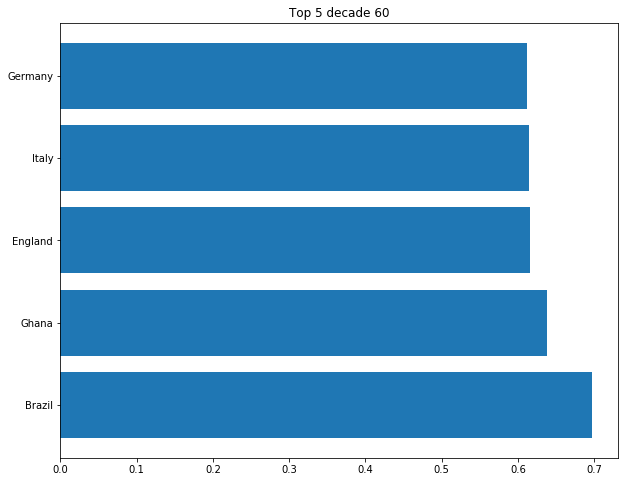

In [47]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_60['team'], top_5_decade_60['winning_rate'],align='center')
plt.title('Top 5 decade 60')
plt.show()

In [48]:
pwii_wins_decade_70 = decade_70.results.value_counts()
pwii_wins_decade_70_df = pd.DataFrame(pwii_wins_decade_70)
pwii_wins_decade_70_df = pwii_wins_decade_70_df.reset_index()
pwii_wins_decade_70_df = pwii_wins_decade_70_df.rename(columns={'index':'team'})
pwii_wins_decade_70_df.head()

,team,results
0,Tie,886
1,South Korea,105
2,Germany,66
3,Poland,63
4,Brazil,62


In [49]:
pwii_grouped_home_decade_70 = decade_70.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_70 = pwii_grouped_home_decade_70.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_70.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Afghanistan,2,4,6
1,Albania,13,12,25
2,Algeria,70,27,97
3,Angola,2,3,5
4,Antigua and Barbuda,4,20,24


In [50]:
pwii_grouped_away_decade_70 = decade_70.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_70 = pwii_grouped_away_decade_70.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_70.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,22,5,27
1,Albania,14,1,15
2,Algeria,54,23,77
3,Angola,8,8,16
4,Antigua and Barbuda,20,2,22


In [51]:
pwii_overview_score_decade_70 = pd.merge(pwii_grouped_home_score_decade_70,pwii_grouped_away_score_decade_70,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_70.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,2.0,4.0,6.0,Afghanistan,22.0,5.0,27.0
1,Albania,13.0,12.0,25.0,Albania,14.0,1.0,15.0
2,Algeria,70.0,27.0,97.0,Algeria,54.0,23.0,77.0
3,Angola,2.0,3.0,5.0,Angola,8.0,8.0,16.0
4,Antigua and Barbuda,4.0,20.0,24.0,Antigua and Barbuda,20.0,2.0,22.0


In [52]:
pwii_grouped_home_count_decade_70 = decade_70.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [53]:
pwii_grouped_away_count_decade_70 = decade_70.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [54]:
pwii_overview_count_decade_70 = pd.merge(pwii_grouped_home_count_decade_70,pwii_grouped_away_count_decade_70, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_70 = pwii_overview_count_decade_70.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [55]:
pwii_overview_combined_decade_70 = pd.merge(pwii_overview_count_decade_70,pwii_overview_score_decade_70,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_70 = pwii_overview_combined_decade_70.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_70.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,3.0,3.0,Afghanistan,8.0,8.0,2.0,4.0,6.0,22.0,5.0,27.0
1,Albania,10.0,10.0,Albania,6.0,6.0,13.0,12.0,25.0,14.0,1.0,15.0
2,Algeria,38.0,38.0,Algeria,29.0,29.0,70.0,27.0,97.0,54.0,23.0,77.0
3,Angola,4.0,4.0,Angola,6.0,6.0,2.0,3.0,5.0,8.0,8.0,16.0
4,Antigua and Barbuda,8.0,8.0,Antigua and Barbuda,4.0,4.0,4.0,20.0,24.0,20.0,2.0,22.0


In [56]:
pwii_overview_combined_decade_70['total_goals']=pwii_overview_combined_decade_70.home_goals + pwii_overview_combined_decade_70.away_goals
pwii_overview_combined_decade_70['total_games']=pwii_overview_combined_decade_70.home_game_count + pwii_overview_combined_decade_70.away_game_count


In [57]:
pwii_overview_combined_wins_decade_70 = pd.merge(pwii_overview_combined_decade_70,pwii_wins_decade_70_df,how='outer')
pwii_overview_combined_wins_decade_70.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Afghanistan,3.0,3.0,Afghanistan,8.0,8.0,2.0,4.0,6.0,22.0,5.0,27.0,7.0,11.0,1.0
1,Albania,10.0,10.0,Albania,6.0,6.0,13.0,12.0,25.0,14.0,1.0,15.0,14.0,16.0,4.0
2,Algeria,38.0,38.0,Algeria,29.0,29.0,70.0,27.0,97.0,54.0,23.0,77.0,93.0,67.0,27.0
3,Angola,4.0,4.0,Angola,6.0,6.0,2.0,3.0,5.0,8.0,8.0,16.0,10.0,10.0,2.0
4,Antigua and Barbuda,8.0,8.0,Antigua and Barbuda,4.0,4.0,4.0,20.0,24.0,20.0,2.0,22.0,6.0,12.0,1.0


In [58]:
pwii_overview_combined_wins_decade_70['winning_rate']=pwii_overview_combined_wins_decade_70.results / pwii_overview_combined_wins_decade_70.total_games
pwii_overview_combined_ranked_decade_70 = pwii_overview_combined_wins_decade_70.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_70.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
31,Chad,1.0,1.0,Chad,1.0,1.0,4.0,0.0,4.0,0.0,1.0,1.0,5.0,2.0,2.0,1.000000
61,Germany,53.0,53.0,Germany,46.0,46.0,126.0,30.0,156.0,42.0,87.0,129.0,213.0,99.0,66.0,0.666667
158,Tahiti,13.0,13.0,Tahiti,21.0,21.0,79.0,13.0,92.0,39.0,59.0,98.0,138.0,34.0,22.0,0.647059
19,Brazil,61.0,61.0,Brazil,35.0,35.0,127.0,32.0,159.0,26.0,50.0,76.0,177.0,96.0,62.0,0.645833
149,South Korea,93.0,93.0,South Korea,72.0,72.0,224.0,51.0,275.0,60.0,139.0,199.0,363.0,165.0,105.0,0.636364


In [59]:
scoped_down_decade_70 = pwii_overview_combined_ranked_decade_70.loc[pwii_overview_combined_ranked_decade_70['total_games'] >= 50, :]
scoped_down_decade_70.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
61,Germany,53.0,53.0,Germany,46.0,46.0,126.0,30.0,156.0,42.0,87.0,129.0,213.0,99.0,66.0,0.666667
19,Brazil,61.0,61.0,Brazil,35.0,35.0,127.0,32.0,159.0,26.0,50.0,76.0,177.0,96.0,62.0,0.645833
149,South Korea,93.0,93.0,South Korea,72.0,72.0,224.0,51.0,275.0,60.0,139.0,199.0,363.0,165.0,105.0,0.636364
33,China PR,33.0,33.0,China PR,33.0,33.0,112.0,46.0,158.0,38.0,42.0,80.0,154.0,66.0,39.0,0.590909
110,Netherlands,36.0,36.0,Netherlands,44.0,44.0,98.0,20.0,118.0,51.0,74.0,125.0,172.0,80.0,47.0,0.587500


In [60]:
top_5_decade_70 = scoped_down_decade_70.iloc[:5, :]
top_5_decade_70.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
61,Germany,53.0,53.0,Germany,46.0,46.0,126.0,30.0,156.0,42.0,87.0,129.0,213.0,99.0,66.0,0.666667
19,Brazil,61.0,61.0,Brazil,35.0,35.0,127.0,32.0,159.0,26.0,50.0,76.0,177.0,96.0,62.0,0.645833
149,South Korea,93.0,93.0,South Korea,72.0,72.0,224.0,51.0,275.0,60.0,139.0,199.0,363.0,165.0,105.0,0.636364
33,China PR,33.0,33.0,China PR,33.0,33.0,112.0,46.0,158.0,38.0,42.0,80.0,154.0,66.0,39.0,0.590909
110,Netherlands,36.0,36.0,Netherlands,44.0,44.0,98.0,20.0,118.0,51.0,74.0,125.0,172.0,80.0,47.0,0.587500


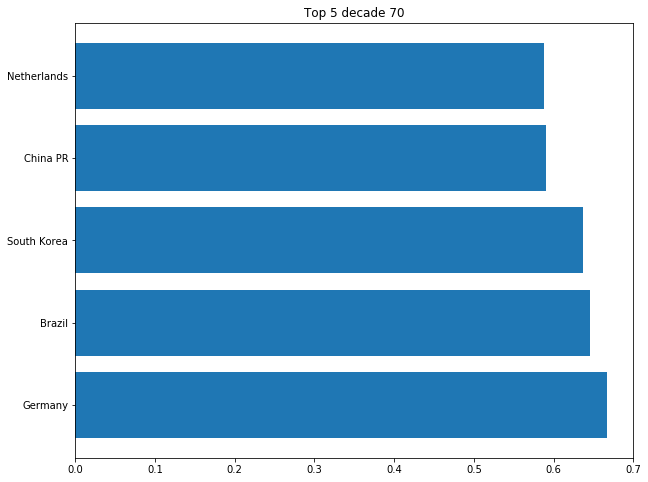

In [61]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_70['team'], top_5_decade_70['winning_rate'],align='center')
plt.title('Top 5 decade 70')
plt.show()

In [62]:
pwii_wins_decade_80 = decade_80.results.value_counts()
pwii_wins_decade_80_df = pd.DataFrame(pwii_wins_decade_80)
pwii_wins_decade_80_df = pwii_wins_decade_80_df.reset_index()
pwii_wins_decade_80_df = pwii_wins_decade_80_df.rename(columns={'index':'team'})
pwii_wins_decade_80_df.head()

,team,results
0,Tie,1251
1,Brazil,70
2,South Korea,67
3,Germany,63
4,England,59


In [63]:
pwii_grouped_home_decade_80 = decade_80.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_80 = pwii_grouped_home_decade_80.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_80.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Albania,10,23,33
1,Algeria,146,55,201
2,American Samoa,6,35,41
3,Andalusia,1,1,2
4,Angola,38,27,65


In [64]:
pwii_grouped_away_decade_80 = decade_80.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_80 = pwii_grouped_away_decade_80.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_80.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,20,1,21
1,Albania,63,7,70
2,Algeria,46,31,77
3,American Samoa,13,1,14
4,Angola,41,21,62


In [65]:
pwii_overview_score_decade_80 = pd.merge(pwii_grouped_home_score_decade_80,pwii_grouped_away_score_decade_80,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_80.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,10.0,23.0,33.0,Albania,63.0,7.0,70.0
1,Algeria,146.0,55.0,201.0,Algeria,46.0,31.0,77.0
2,American Samoa,6.0,35.0,41.0,American Samoa,13.0,1.0,14.0
3,Andalusia,1.0,1.0,2.0,NaN,NaN,NaN,NaN
4,Angola,38.0,27.0,65.0,Angola,41.0,21.0,62.0


In [67]:
pwii_grouped_home_count_decade_80 = decade_80.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [68]:
pwii_grouped_away_count_decade_80 = decade_80.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [70]:
pwii_overview_count_decade_80 = pd.merge(pwii_grouped_home_count_decade_80,pwii_grouped_away_count_decade_80, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_80 = pwii_overview_count_decade_80.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [71]:
pwii_overview_combined_decade_80 = pd.merge(pwii_overview_count_decade_80,pwii_overview_score_decade_80,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_80 = pwii_overview_combined_decade_80.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_80.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Albania,19.0,19.0,Albania,19.0,19.0,10.0,23.0,33.0,63.0,7.0,70.0
1,Algeria,77.0,77.0,Algeria,41.0,41.0,146.0,55.0,201.0,46.0,31.0,77.0
2,American Samoa,5.0,5.0,American Samoa,2.0,2.0,6.0,35.0,41.0,13.0,1.0,14.0
3,Andalusia,2.0,2.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN
4,Angola,29.0,29.0,Angola,28.0,28.0,38.0,27.0,65.0,41.0,21.0,62.0


In [72]:
pwii_overview_combined_decade_80['total_goals']=pwii_overview_combined_decade_80.home_goals + pwii_overview_combined_decade_80.away_goals
pwii_overview_combined_decade_80['total_games']=pwii_overview_combined_decade_80.home_game_count + pwii_overview_combined_decade_80.away_game_count


In [73]:
pwii_overview_combined_wins_decade_80 = pd.merge(pwii_overview_combined_decade_80,pwii_wins_decade_80_df,how='outer')
pwii_overview_combined_wins_decade_80.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Albania,19.0,19.0,Albania,19.0,19.0,10.0,23.0,33.0,63.0,7.0,70.0,17.0,38.0,1.0
1,Algeria,77.0,77.0,Algeria,41.0,41.0,146.0,55.0,201.0,46.0,31.0,77.0,177.0,118.0,55.0
2,American Samoa,5.0,5.0,American Samoa,2.0,2.0,6.0,35.0,41.0,13.0,1.0,14.0,7.0,7.0,1.0
3,Andalusia,2.0,2.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,29.0,29.0,Angola,28.0,28.0,38.0,27.0,65.0,41.0,21.0,62.0,59.0,57.0,20.0


In [74]:
pwii_overview_combined_wins_decade_80['winning_rate']=pwii_overview_combined_wins_decade_80.results / pwii_overview_combined_wins_decade_80.total_games
pwii_overview_combined_ranked_decade_80 = pwii_overview_combined_wins_decade_80.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_80.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
161,Tahiti,4.0,4.0,Tahiti,15.0,15.0,9.0,2.0,11.0,9.0,44.0,53.0,53.0,19.0,15.0,0.789474
178,Ynys Môn,2.0,2.0,Ynys Môn,2.0,2.0,4.0,0.0,4.0,10.0,5.0,15.0,9.0,4.0,3.0,0.750000
139,Saint Martin,2.0,2.0,Saint Martin,1.0,1.0,5.0,1.0,6.0,1.0,0.0,1.0,5.0,3.0,2.0,0.666667
112,New Caledonia,19.0,19.0,New Caledonia,6.0,6.0,59.0,13.0,72.0,15.0,3.0,18.0,62.0,25.0,15.0,0.600000
21,Brazil,66.0,66.0,Brazil,51.0,51.0,142.0,38.0,180.0,49.0,70.0,119.0,212.0,117.0,70.0,0.598291


In [75]:
scoped_down_decade_80 = pwii_overview_combined_ranked_decade_80.loc[pwii_overview_combined_ranked_decade_80['total_games'] >= 50, :]
scoped_down_decade_80.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
21,Brazil,66.0,66.0,Brazil,51.0,51.0,142.0,38.0,180.0,49.0,70.0,119.0,212.0,117.0,70.0,0.598291
106,Mexico,48.0,48.0,Mexico,29.0,29.0,94.0,31.0,125.0,30.0,38.0,68.0,132.0,77.0,44.0,0.571429
64,Germany,63.0,63.0,Germany,51.0,51.0,130.0,50.0,180.0,57.0,76.0,133.0,206.0,114.0,63.0,0.552632
152,South Korea,64.0,64.0,South Korea,61.0,61.0,133.0,33.0,166.0,66.0,76.0,142.0,209.0,125.0,67.0,0.536000
82,Iraq,45.0,45.0,Iraq,43.0,43.0,97.0,33.0,130.0,35.0,58.0,93.0,155.0,88.0,47.0,0.534091


In [76]:
top_5_decade_80 = scoped_down_decade_80.iloc[:5, :]
top_5_decade_80.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
21,Brazil,66.0,66.0,Brazil,51.0,51.0,142.0,38.0,180.0,49.0,70.0,119.0,212.0,117.0,70.0,0.598291
106,Mexico,48.0,48.0,Mexico,29.0,29.0,94.0,31.0,125.0,30.0,38.0,68.0,132.0,77.0,44.0,0.571429
64,Germany,63.0,63.0,Germany,51.0,51.0,130.0,50.0,180.0,57.0,76.0,133.0,206.0,114.0,63.0,0.552632
152,South Korea,64.0,64.0,South Korea,61.0,61.0,133.0,33.0,166.0,66.0,76.0,142.0,209.0,125.0,67.0,0.536000
82,Iraq,45.0,45.0,Iraq,43.0,43.0,97.0,33.0,130.0,35.0,58.0,93.0,155.0,88.0,47.0,0.534091


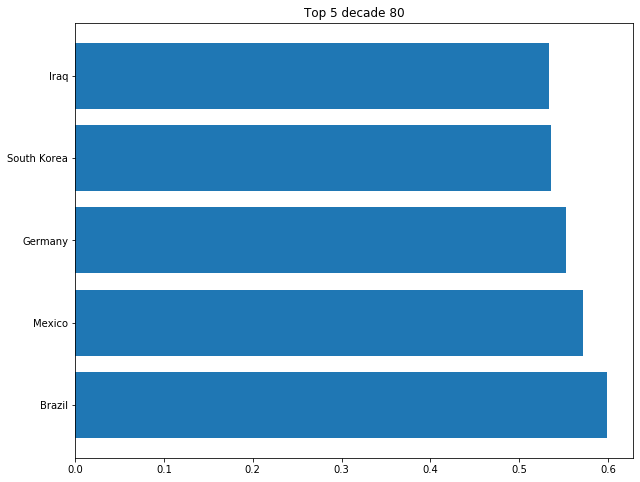

In [77]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_80['team'], top_5_decade_80['winning_rate'],align='center')
plt.title('Top 5 decade 80')
plt.show()

In [78]:
pwii_wins_decade_90 = decade_90.results.value_counts()
pwii_wins_decade_90_df = pd.DataFrame(pwii_wins_decade_90)
pwii_wins_decade_90_df = pwii_wins_decade_90_df.reset_index()
pwii_wins_decade_90_df = pwii_wins_decade_90_df.rename(columns={'index':'team'})
pwii_wins_decade_90_df.head()

,team,results
0,Tie,1736
1,Brazil,109
2,Mexico,87
3,Saudi Arabia,85
4,Germany,76


In [79]:
pwii_grouped_home_decade_90 = decade_90.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_90 = pwii_grouped_home_decade_90.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_90.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Albania,38,38,76
1,Algeria,74,33,107
2,American Samoa,1,2,3
3,Andalusia,3,0,3
4,Andorra,7,24,31


In [80]:
pwii_grouped_away_decade_90 = decade_90.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_90 = pwii_grouped_away_decade_90.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_90.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,69,25,94
1,Algeria,56,43,99
2,American Samoa,30,6,36
3,Andorra,48,6,54
4,Angola,38,27,65


In [81]:
pwii_overview_score_decade_90 = pd.merge(pwii_grouped_home_score_decade_90,pwii_grouped_away_score_decade_90,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_90.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Albania,38.0,38.0,76.0,Albania,69.0,25.0,94.0
1,Algeria,74.0,33.0,107.0,Algeria,56.0,43.0,99.0
2,American Samoa,1.0,2.0,3.0,American Samoa,30.0,6.0,36.0
3,Andalusia,3.0,0.0,3.0,NaN,NaN,NaN,NaN
4,Andorra,7.0,24.0,31.0,Andorra,48.0,6.0,54.0


In [82]:
pwii_grouped_home_count_decade_90 = decade_90.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [83]:
pwii_grouped_away_count_decade_90 = decade_90.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [84]:
pwii_overview_count_decade_90 = pd.merge(pwii_grouped_home_count_decade_90,pwii_grouped_away_count_decade_90, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_90 = pwii_overview_count_decade_90.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [85]:
pwii_overview_combined_decade_90 = pd.merge(pwii_overview_count_decade_90,pwii_overview_score_decade_90,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_90 = pwii_overview_combined_decade_90.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_90.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Albania,33.0,33.0,Albania,34.0,34.0,38.0,38.0,76.0,69.0,25.0,94.0
1,Algeria,43.0,43.0,Algeria,50.0,50.0,74.0,33.0,107.0,56.0,43.0,99.0
2,American Samoa,1.0,1.0,American Samoa,7.0,7.0,1.0,2.0,3.0,30.0,6.0,36.0
3,Andalusia,2.0,2.0,NaN,NaN,NaN,3.0,0.0,3.0,NaN,NaN,NaN
4,Andorra,12.0,12.0,Andorra,15.0,15.0,7.0,24.0,31.0,48.0,6.0,54.0


In [87]:
pwii_overview_combined_decade_90['total_goals']=pwii_overview_combined_decade_90.home_goals + pwii_overview_combined_decade_90.away_goals
pwii_overview_combined_decade_90['total_games']=pwii_overview_combined_decade_90.home_game_count + pwii_overview_combined_decade_90.away_game_count

In [88]:
pwii_overview_combined_wins_decade_90 = pd.merge(pwii_overview_combined_decade_90,pwii_wins_decade_90_df,how='outer')
pwii_overview_combined_wins_decade_90.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Albania,33.0,33.0,Albania,34.0,34.0,38.0,38.0,76.0,69.0,25.0,94.0,63.0,67.0,16.0
1,Algeria,43.0,43.0,Algeria,50.0,50.0,74.0,33.0,107.0,56.0,43.0,99.0,117.0,93.0,33.0
2,American Samoa,1.0,1.0,American Samoa,7.0,7.0,1.0,2.0,3.0,30.0,6.0,36.0,7.0,8.0,NaN
3,Andalusia,2.0,2.0,NaN,NaN,NaN,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0
4,Andorra,12.0,12.0,Andorra,15.0,15.0,7.0,24.0,31.0,48.0,6.0,54.0,13.0,27.0,1.0


In [89]:
pwii_overview_combined_wins_decade_90['winning_rate']=pwii_overview_combined_wins_decade_90.results / pwii_overview_combined_wins_decade_90.total_games
pwii_overview_combined_ranked_decade_90 = pwii_overview_combined_wins_decade_90.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_90.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
112,Jersey,18.0,18.0,Jersey,13.0,13.0,45.0,15.0,60.0,18.0,18.0,36.0,63.0,31.0,22.0,0.709677
28,Brazil,95.0,95.0,Brazil,68.0,68.0,251.0,67.0,318.0,65.0,130.0,195.0,381.0,163.0,109.0,0.668712
75,France,61.0,61.0,France,46.0,46.0,124.0,50.0,174.0,30.0,71.0,101.0,195.0,107.0,66.0,0.616822
81,Germany,57.0,57.0,Germany,69.0,69.0,140.0,47.0,187.0,69.0,105.0,174.0,245.0,126.0,76.0,0.603175
104,Iraq,25.0,25.0,Iraq,38.0,38.0,62.0,13.0,75.0,44.0,79.0,123.0,141.0,63.0,37.0,0.587302


In [90]:
scoped_down_decade_90 = pwii_overview_combined_ranked_decade_90.loc[pwii_overview_combined_ranked_decade_90['total_games'] >= 50, :]
scoped_down_decade_90.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
28,Brazil,95.0,95.0,Brazil,68.0,68.0,251.0,67.0,318.0,65.0,130.0,195.0,381.0,163.0,109.0,0.668712
75,France,61.0,61.0,France,46.0,46.0,124.0,50.0,174.0,30.0,71.0,101.0,195.0,107.0,66.0,0.616822
81,Germany,57.0,57.0,Germany,69.0,69.0,140.0,47.0,187.0,69.0,105.0,174.0,245.0,126.0,76.0,0.603175
104,Iraq,25.0,25.0,Iraq,38.0,38.0,62.0,13.0,75.0,44.0,79.0,123.0,141.0,63.0,37.0,0.587302
56,Czech Republic,39.0,39.0,Czech Republic,50.0,50.0,98.0,30.0,128.0,51.0,70.0,121.0,168.0,89.0,52.0,0.584270


In [92]:
top_5_decade_90 = scoped_down_decade_90.iloc[:5, :]
top_5_decade_90.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
28,Brazil,95.0,95.0,Brazil,68.0,68.0,251.0,67.0,318.0,65.0,130.0,195.0,381.0,163.0,109.0,0.668712
75,France,61.0,61.0,France,46.0,46.0,124.0,50.0,174.0,30.0,71.0,101.0,195.0,107.0,66.0,0.616822
81,Germany,57.0,57.0,Germany,69.0,69.0,140.0,47.0,187.0,69.0,105.0,174.0,245.0,126.0,76.0,0.603175
104,Iraq,25.0,25.0,Iraq,38.0,38.0,62.0,13.0,75.0,44.0,79.0,123.0,141.0,63.0,37.0,0.587302
56,Czech Republic,39.0,39.0,Czech Republic,50.0,50.0,98.0,30.0,128.0,51.0,70.0,121.0,168.0,89.0,52.0,0.584270


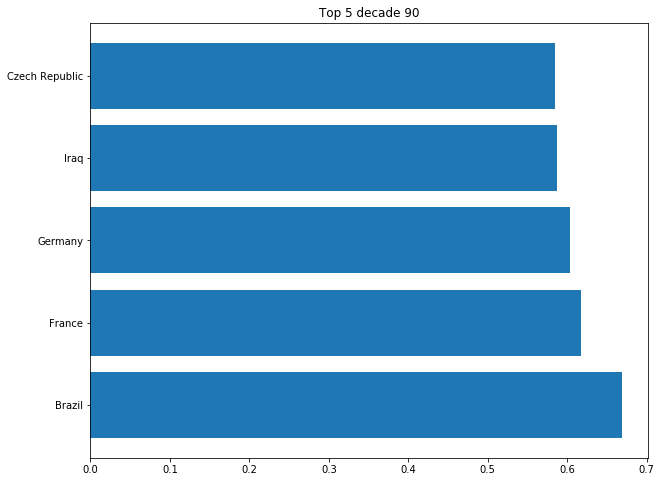

In [93]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_90['team'], top_5_decade_90['winning_rate'],align='center')
plt.title('Top 5 decade 90')
plt.show()

In [109]:
pwii_wins_decade_2000 = decade_2000.results.value_counts()
pwii_wins_decade_2000_df = pd.DataFrame(pwii_wins_decade_2000)
pwii_wins_decade_2000_df = pwii_wins_decade_2000_df.reset_index()
pwii_wins_decade_2000_df = pwii_wins_decade_2000_df.rename(columns={'index':'team'})
pwii_wins_decade_2000_df.head()

,team,results
0,Tie,2192
1,Saudi Arabia,100
2,Spain,98
3,Mexico,98
4,Brazil,97


In [95]:
pwii_grouped_home_decade_2000 = decade_2000.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_2000 = pwii_grouped_home_decade_2000.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_2000.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Afghanistan,4,26,30
1,Albania,58,42,100
2,Alderney,0,3,3
3,Algeria,85,75,160
4,American Samoa,3,71,74


In [96]:
pwii_grouped_away_decade_2000 = decade_2000.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_2000 = pwii_grouped_away_decade_2000.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_2000.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,53,14,67
1,Albania,74,31,105
2,Alderney,10,3,13
3,Algeria,48,28,76
4,American Samoa,87,1,88


In [97]:
pwii_overview_score_decade_2000 = pd.merge(pwii_grouped_home_score_decade_2000,pwii_grouped_away_score_decade_2000,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_2000.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,4.0,26.0,30.0,Afghanistan,53.0,14.0,67.0
1,Albania,58.0,42.0,100.0,Albania,74.0,31.0,105.0
2,Alderney,0.0,3.0,3.0,Alderney,10.0,3.0,13.0
3,Algeria,85.0,75.0,160.0,Algeria,48.0,28.0,76.0
4,American Samoa,3.0,71.0,74.0,American Samoa,87.0,1.0,88.0


In [98]:
pwii_grouped_home_count_decade_2000 = decade_2000.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [99]:
pwii_grouped_away_count_decade_2000 = decade_2000.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [100]:
pwii_overview_count_decade_2000 = pd.merge(pwii_grouped_home_count_decade_2000,pwii_grouped_away_count_decade_2000, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_2000 = pwii_overview_count_decade_2000.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [101]:
pwii_overview_combined_decade_2000 = pd.merge(pwii_overview_count_decade_2000,pwii_overview_score_decade_2000,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_2000 = pwii_overview_combined_decade_2000.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_2000.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Afghanistan,9.0,9.0,Afghanistan,19.0,19.0,4.0,26.0,30.0,53.0,14.0,67.0
1,Albania,46.0,46.0,Albania,41.0,41.0,58.0,42.0,100.0,74.0,31.0,105.0
2,Alderney,1.0,1.0,Alderney,3.0,3.0,0.0,3.0,3.0,10.0,3.0,13.0
3,Algeria,63.0,63.0,Algeria,41.0,41.0,85.0,75.0,160.0,48.0,28.0,76.0
4,American Samoa,8.0,8.0,American Samoa,8.0,8.0,3.0,71.0,74.0,87.0,1.0,88.0


In [102]:
pwii_overview_combined_decade_2000['total_goals']=pwii_overview_combined_decade_2000.home_goals + pwii_overview_combined_decade_2000.away_goals
pwii_overview_combined_decade_2000['total_games']=pwii_overview_combined_decade_2000.home_game_count + pwii_overview_combined_decade_2000.away_game_count


In [103]:
pwii_overview_combined_wins_decade_2000 = pd.merge(pwii_overview_combined_decade_2000,pwii_wins_decade_2000_df,how='outer')
pwii_overview_combined_wins_decade_2000.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Afghanistan,9.0,9.0,Afghanistan,19.0,19.0,4.0,26.0,30.0,53.0,14.0,67.0,18.0,28.0,NaN
1,Albania,46.0,46.0,Albania,41.0,41.0,58.0,42.0,100.0,74.0,31.0,105.0,89.0,87.0,16.0
2,Alderney,1.0,1.0,Alderney,3.0,3.0,0.0,3.0,3.0,10.0,3.0,13.0,3.0,4.0,NaN
3,Algeria,63.0,63.0,Algeria,41.0,41.0,85.0,75.0,160.0,48.0,28.0,76.0,113.0,104.0,33.0
4,American Samoa,8.0,8.0,American Samoa,8.0,8.0,3.0,71.0,74.0,87.0,1.0,88.0,4.0,16.0,NaN


In [104]:
pwii_overview_combined_wins_decade_2000['winning_rate']=pwii_overview_combined_wins_decade_2000.results / pwii_overview_combined_wins_decade_2000.total_games
pwii_overview_combined_ranked_decade_2000 = pwii_overview_combined_wins_decade_2000.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_2000.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
116,Isle of Wight,6.0,6.0,Isle of Wight,7.0,7.0,10.0,9.0,19.0,16.0,26.0,42.0,36.0,13.0,12.0,0.923077
202,Saint Vincent and the Grenadines,9.0,9.0,Saint Vincent and the Grenadines,12.0,12.0,14.0,10.0,24.0,15.0,22.0,37.0,36.0,21.0,16.0,0.761905
230,Tahiti,18.0,18.0,Tahiti,16.0,16.0,33.0,18.0,51.0,44.0,26.0,70.0,59.0,34.0,25.0,0.735294
31,Brazil,67.0,67.0,Brazil,86.0,86.0,147.0,39.0,186.0,73.0,169.0,242.0,316.0,153.0,109.0,0.712418
80,Fiji,28.0,28.0,Fiji,12.0,12.0,103.0,22.0,125.0,26.0,25.0,51.0,128.0,40.0,27.0,0.675000


In [105]:
scoped_down_decade_2000 = pwii_overview_combined_ranked_decade_2000.loc[pwii_overview_combined_ranked_decade_2000['total_games'] >= 50, :]
scoped_down_decade_2000.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
31,Brazil,67.0,67.0,Brazil,86.0,86.0,147.0,39.0,186.0,73.0,169.0,242.0,316.0,153.0,109.0,0.712418
195,Russia,47.0,47.0,Russia,53.0,53.0,89.0,37.0,126.0,70.0,69.0,139.0,158.0,100.0,60.0,0.600000
194,Romania,56.0,56.0,Romania,48.0,48.0,99.0,50.0,149.0,48.0,65.0,113.0,164.0,104.0,61.0,0.586538
11,Argentina,58.0,58.0,Argentina,68.0,68.0,134.0,54.0,188.0,68.0,101.0,169.0,235.0,126.0,69.0,0.547619
120,Jamaica,68.0,68.0,Jamaica,72.0,72.0,144.0,55.0,199.0,91.0,68.0,159.0,212.0,140.0,76.0,0.542857


In [106]:
top_5_decade_2000 = scoped_down_decade_2000.iloc[:5, :]
top_5_decade_2000.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
31,Brazil,67.0,67.0,Brazil,86.0,86.0,147.0,39.0,186.0,73.0,169.0,242.0,316.0,153.0,109.0,0.712418
195,Russia,47.0,47.0,Russia,53.0,53.0,89.0,37.0,126.0,70.0,69.0,139.0,158.0,100.0,60.0,0.600000
194,Romania,56.0,56.0,Romania,48.0,48.0,99.0,50.0,149.0,48.0,65.0,113.0,164.0,104.0,61.0,0.586538
11,Argentina,58.0,58.0,Argentina,68.0,68.0,134.0,54.0,188.0,68.0,101.0,169.0,235.0,126.0,69.0,0.547619
120,Jamaica,68.0,68.0,Jamaica,72.0,72.0,144.0,55.0,199.0,91.0,68.0,159.0,212.0,140.0,76.0,0.542857


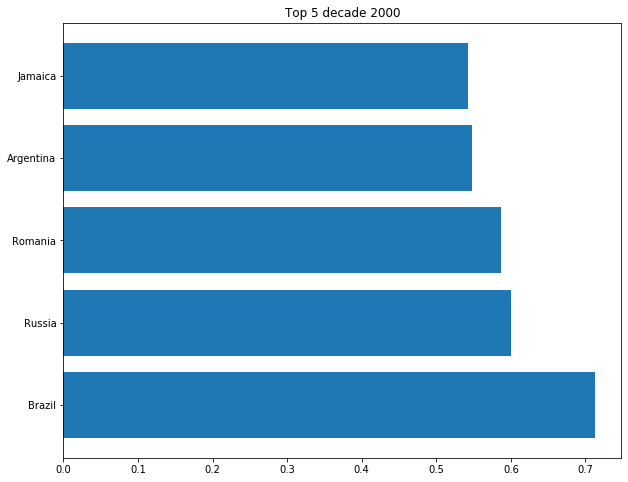

In [107]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_2000['team'], top_5_decade_2000['winning_rate'],align='center')
plt.title('Top 5 decade 2000')
plt.show()

In [108]:
pwii_wins_decade_2010 = decade_2010.results.value_counts()
pwii_wins_decade_2010_df = pd.DataFrame(pwii_wins_decade_2010)
pwii_wins_decade_2010_df = pwii_wins_decade_2010_df.reset_index()
pwii_wins_decade_2010_df = pwii_wins_decade_2010_df.rename(columns={'index':'team'})
pwii_wins_decade_2010_df.head()

,team,results
0,Tie,1935
1,Brazil,84
2,Mexico,81
3,Spain,76
4,France,72


In [110]:
pwii_grouped_home_decade_2010 = decade_2010.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score_decade_2010 = pwii_grouped_home_decade_2010.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score_decade_2010.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Abkhazia,36,11,47
1,Afghanistan,42,26,68
2,Albania,46,54,100
3,Alderney,5,24,29
4,Algeria,105,35,140


In [111]:
pwii_grouped_away_decade_2010 = decade_2010.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score_decade_2010 = pwii_grouped_away_decade_2010.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score_decade_2010.head()

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,13,12,25
1,Afghanistan,54,43,97
2,Albania,42,34,76
3,Alderney,38,7,45
4,Algeria,54,57,111


In [112]:
pwii_overview_score_decade_2010 = pd.merge(pwii_grouped_home_score_decade_2010,pwii_grouped_away_score_decade_2010,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score_decade_2010.head()

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,36.0,11.0,47.0,Abkhazia,13.0,12.0,25.0
1,Afghanistan,42.0,26.0,68.0,Afghanistan,54.0,43.0,97.0
2,Albania,46.0,54.0,100.0,Albania,42.0,34.0,76.0
3,Alderney,5.0,24.0,29.0,Alderney,38.0,7.0,45.0
4,Algeria,105.0,35.0,140.0,Algeria,54.0,57.0,111.0


In [113]:
pwii_grouped_home_count_decade_2010 = decade_2010.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])


In [114]:
pwii_grouped_away_count_decade_2010 = decade_2010.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])

In [116]:
pwii_overview_count_decade_2010 = pd.merge(pwii_grouped_home_count_decade_2010,pwii_grouped_away_count_decade_2010, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count_decade_2010 = pwii_overview_count_decade_2010.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [117]:
pwii_overview_combined_decade_2010 = pd.merge(pwii_overview_count_decade_2010,pwii_overview_score_decade_2010,on=['home_team','away_team'],how='outer')
pwii_overview_combined_decade_2010 = pwii_overview_combined_decade_2010.rename(columns={'home_team':'team'})
pwii_overview_combined_decade_2010.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,18.0,18.0,Abkhazia,10.0,10.0,36.0,11.0,47.0,13.0,12.0,25.0
1,Afghanistan,24.0,24.0,Afghanistan,37.0,37.0,42.0,26.0,68.0,54.0,43.0,97.0
2,Albania,45.0,45.0,Albania,36.0,36.0,46.0,54.0,100.0,42.0,34.0,76.0
3,Alderney,6.0,6.0,Alderney,9.0,9.0,5.0,24.0,29.0,38.0,7.0,45.0
4,Algeria,47.0,47.0,Algeria,41.0,41.0,105.0,35.0,140.0,54.0,57.0,111.0


In [118]:
pwii_overview_combined_decade_2010['total_goals']=pwii_overview_combined_decade_2010.home_goals + pwii_overview_combined_decade_2010.away_goals
pwii_overview_combined_decade_2010['total_games']=pwii_overview_combined_decade_2010.home_game_count + pwii_overview_combined_decade_2010.away_game_count


In [119]:
pwii_overview_combined_wins_decade_2010 = pd.merge(pwii_overview_combined_decade_2010,pwii_wins_decade_2010_df,how='outer')
pwii_overview_combined_wins_decade_2010.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Abkhazia,18.0,18.0,Abkhazia,10.0,10.0,36.0,11.0,47.0,13.0,12.0,25.0,48.0,28.0,12.0
1,Afghanistan,24.0,24.0,Afghanistan,37.0,37.0,42.0,26.0,68.0,54.0,43.0,97.0,85.0,61.0,25.0
2,Albania,45.0,45.0,Albania,36.0,36.0,46.0,54.0,100.0,42.0,34.0,76.0,80.0,81.0,28.0
3,Alderney,6.0,6.0,Alderney,9.0,9.0,5.0,24.0,29.0,38.0,7.0,45.0,12.0,15.0,2.0
4,Algeria,47.0,47.0,Algeria,41.0,41.0,105.0,35.0,140.0,54.0,57.0,111.0,162.0,88.0,49.0


In [120]:
pwii_overview_combined_wins_decade_2010['winning_rate']=pwii_overview_combined_wins_decade_2010.results / pwii_overview_combined_wins_decade_2010.total_games
pwii_overview_combined_ranked_decade_2010 = pwii_overview_combined_wins_decade_2010.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked_decade_2010.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
211,Réunion,4.0,4.0,Réunion,2.0,2.0,16.0,3.0,19.0,3.0,7.0,10.0,23.0,6.0,5.0,0.833333
165,Monaco,3.0,3.0,Monaco,2.0,2.0,6.0,1.0,7.0,0.0,2.0,2.0,8.0,5.0,4.0,0.800000
123,Isle of Man,8.0,8.0,Isle of Man,10.0,10.0,39.0,7.0,46.0,14.0,39.0,53.0,78.0,18.0,14.0,0.777778
124,Isle of Wight,8.0,8.0,Isle of Wight,1.0,1.0,23.0,7.0,30.0,0.0,0.0,0.0,23.0,9.0,7.0,0.777778
130,Jersey,11.0,11.0,Jersey,6.0,6.0,38.0,7.0,45.0,5.0,11.0,16.0,49.0,17.0,13.0,0.764706


In [121]:
scoped_down_decade_2010 = pwii_overview_combined_ranked_decade_2010.loc[pwii_overview_combined_ranked_decade_2010['total_games'] >= 50, :]
scoped_down_decade_2010.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
238,Spain,55.0,55.0,Spain,54.0,54.0,153.0,36.0,189.0,43.0,102.0,145.0,255.0,109.0,76.0,0.697248
34,Brazil,72.0,72.0,Brazil,50.0,50.0,159.0,48.0,207.0,30.0,106.0,136.0,265.0,122.0,84.0,0.688525
25,Belgium,58.0,58.0,Belgium,42.0,42.0,145.0,48.0,193.0,39.0,79.0,118.0,224.0,100.0,67.0,0.670000
91,France,72.0,72.0,France,43.0,43.0,153.0,54.0,207.0,39.0,61.0,100.0,214.0,115.0,72.0,0.626087
98,Germany,66.0,66.0,Germany,47.0,47.0,160.0,67.0,227.0,55.0,105.0,160.0,265.0,113.0,70.0,0.619469


In [122]:
top_5_decade_2010 = scoped_down_decade_2010.iloc[:5, :]
top_5_decade_2010.head()

,team,home_game_count,era_x,away_team,away_game_count,era_y,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
238,Spain,55.0,55.0,Spain,54.0,54.0,153.0,36.0,189.0,43.0,102.0,145.0,255.0,109.0,76.0,0.697248
34,Brazil,72.0,72.0,Brazil,50.0,50.0,159.0,48.0,207.0,30.0,106.0,136.0,265.0,122.0,84.0,0.688525
25,Belgium,58.0,58.0,Belgium,42.0,42.0,145.0,48.0,193.0,39.0,79.0,118.0,224.0,100.0,67.0,0.670000
91,France,72.0,72.0,France,43.0,43.0,153.0,54.0,207.0,39.0,61.0,100.0,214.0,115.0,72.0,0.626087
98,Germany,66.0,66.0,Germany,47.0,47.0,160.0,67.0,227.0,55.0,105.0,160.0,265.0,113.0,70.0,0.619469


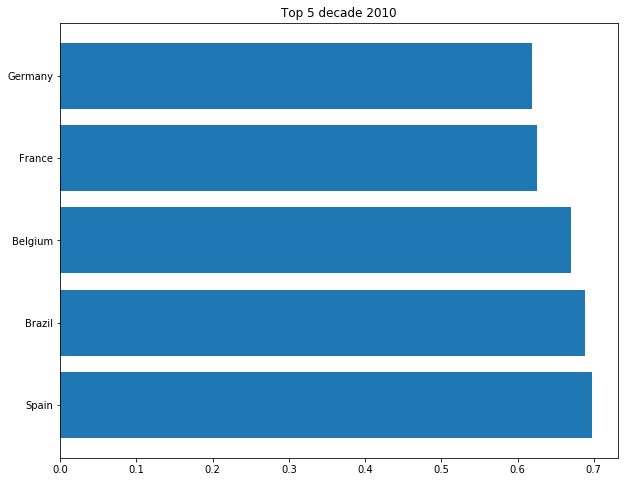

In [123]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_5_decade_2010['team'], top_5_decade_2010['winning_rate'],align='center')
plt.title('Top 5 decade 2010')
plt.show()